# Polynomial Regression
> Documentation: https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Try linear simple regression first

### Prepare independent variable

In [2]:
x = np.random.uniform(-3, 3, 100).reshape(-1, 1)

### Prepare dependent variable

In [3]:
y = x * x - x - 1
error = np.random.rand(100).reshape(-1, 1)
y = y + error * 2
y = y.reshape(-1, 1)

### Simple visualization

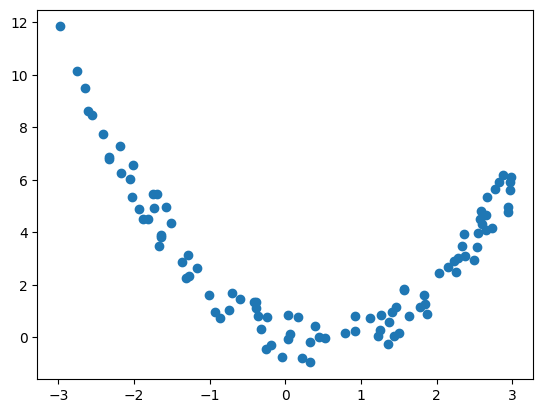

In [4]:
plt.scatter(x, y)

### Split train and test data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### Train the model

In [6]:
reg = LinearRegression()
model = reg.fit(x_train, y_train)

In [7]:
model.coef_, model.intercept_

(array([[-0.43211789]]), array([3.49046928]))

### Evaluate the model

In [8]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 2.046003772293608 MSE: 5.443326919839725 RMSE: 2.33309385148556 R^2 -0.8407121850901689


### Visualiza your result

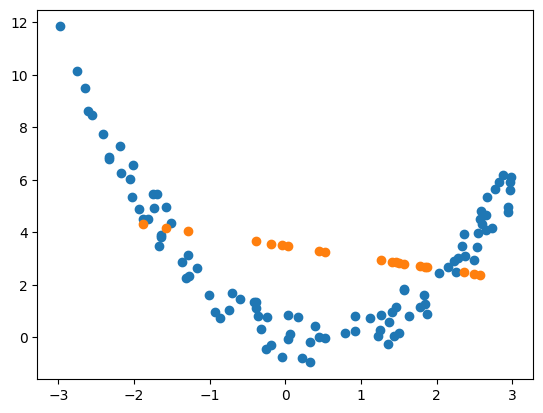

In [9]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Not so good, isn't it?

## Try polinomial features



In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [11]:
poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_test = poly.fit_transform(x_test.reshape(-1, 1))

In [12]:
poly_train

array([[ 1.00000000e+00,  2.53324500e+00,  6.41733022e+00],
       [ 1.00000000e+00,  2.49248431e+00,  6.21247802e+00],
       [ 1.00000000e+00, -2.97802918e+00,  8.86865780e+00],
       [ 1.00000000e+00,  2.14688565e+00,  4.60911799e+00],
       [ 1.00000000e+00,  1.63745328e+00,  2.68125323e+00],
       [ 1.00000000e+00, -3.62182389e-01,  1.31176083e-01],
       [ 1.00000000e+00,  1.46614014e+00,  2.14956692e+00],
       [ 1.00000000e+00, -3.85217819e-01,  1.48392768e-01],
       [ 1.00000000e+00, -7.43342237e-01,  5.52557681e-01],
       [ 1.00000000e+00,  6.17430060e-02,  3.81219879e-03],
       [ 1.00000000e+00,  1.78153036e+00,  3.17385041e+00],
       [ 1.00000000e+00,  2.37884088e+00,  5.65888391e+00],
       [ 1.00000000e+00, -1.64040578e+00,  2.69093114e+00],
       [ 1.00000000e+00,  2.94079825e+00,  8.64829434e+00],
       [ 1.00000000e+00, -1.16216759e+00,  1.35063350e+00],
       [ 1.00000000e+00,  2.22641020e+00,  4.95690240e+00],
       [ 1.00000000e+00, -1.64576323e+00

### Train the model with polynomial features

In [13]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)

LinearRegression()

### Evaluate the model

In [14]:
y_pred = poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 0.4935877883477821 MSE: 0.3646930553052671 RMSE: 0.6038982160143107 R^2 0.9507681088998547


### Visualize the model

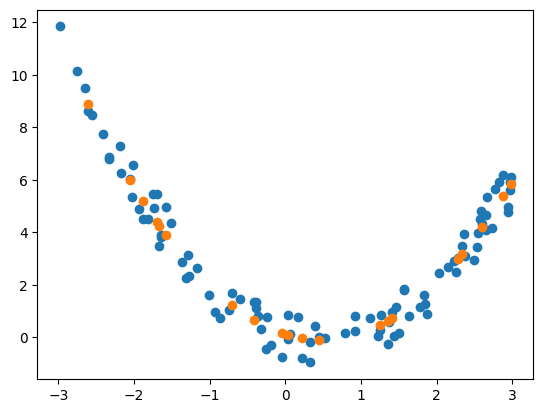

In [15]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Much better! Isn't it?
Is the degree higher, the result better? How about we do degree as 51?

In [16]:
poly = PolynomialFeatures(degree=51)
poly_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_test = poly.fit_transform(x_test.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)
y_pred = poly_reg_model.predict(poly_train)
mae = mean_absolute_error(y_true=y_train, y_pred=y_pred)
mse = mean_squared_error(y_true=y_train, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_train, y_pred=y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print('''Training:
          MAE: {}
          MSE: {}
          RMSE: {}
          R^2 {}'''.format(mae, mse, rmse, r2))

y_pred = poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
rmse = root_mean_squared_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('''Testing:
          MAE: {}
          MSE: {}
          RMSE: {}
          R^2 {}'''.format(mae, mse, rmse, r2))

Training:
          MAE: 1.091349151640804
          MSE: 2.024431898593856
          RMSE: 1.422825322586668
          R^2 0.7230763069248609
Testing:
          MAE: 1.8157804796085895
          MSE: 5.131192551499751
          RMSE: 2.2652135774579296
          R^2 0.30731252149055166


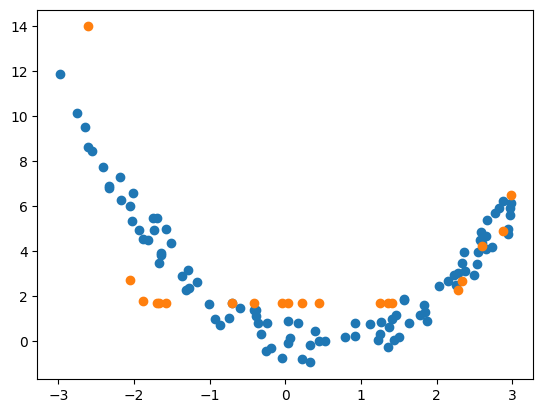

In [17]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Nope!
High degree polynomial regression may result in Overfitting -- Training result is better, but testing result is poor!